# PROBLEM STATEMENT

# Analyze and Present A/B Test Results

Facebook recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”. One of our clients, HotelsForYou.com, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.
In this A/B test, HotelsForYou.com randomly splits its audience into two equally sized groups, e.g. the test and the control group. A Facebook ad campaign with “maximum bidding” is served to “control group” and another campaign with “average bidding” is served to the “test group”.
The A/B test has run for 1 month and HotelsForYou.com now expects you to analyze and present the results of this A/B test.
You should answer the following questions in your presentation:
1. How would you define the hypothesis of this A/B test?
2. Can we conclude statistically significant results?
3. Which statistical test did you use, and why?
4. Based on your answer to Question 2, what would be your recommendation to client?


### Appendix
Facebook Ad: An advertisement created by a business on Facebook that's served up to Facebook users. 

Impressions: The number of times an ad is displayed.

Reach: The number of unique people who saw an ad.

Website Clicks: The number of clicks on ad links directed to Advertiser’s website.

Website Click Through Rate: Number of Website Clicks / Number of Impressions x 100

Cost per Action: Spend / Number of Actions

Action: Can be any conversion event, such as Search, View Content, Add to Cart and Purchase. Conversion Rate: Number of Actions / Number of Website Clicks x 100

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import mannwhitneyu

## Load Data Sets

In [2]:
# Using Pandas to pd.read_excel() for multiple worksheets of the same workbook
control_group = pd.read_excel('Data_Science_Case_Study.xlsx', 'Control_Group')
test_group = pd.read_excel('Data_Science_Case_Study.xlsx', 'Test_Group')

In [ ]:
control_group.head()

In [3]:
# correction of column names
control_group.columns = ['Campaign_Name', 'Date', 'Spend', 'Impressions', 'Reach', 'Website_Clicks', 'Searches', 'View_Content','Add_to_Cart', 'Purchase']
test_group.columns = control_group.columns

In [4]:
control_group

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0
5,Control Campaign,2017.01.06,2306.081623,118268.0,83562.0,6596.0,2955.0,1815.0,1455.0,734.0
6,Control Campaign,2017.01.07,2356.996404,144806.0,105315.0,8139.0,3262.0,2559.0,1502.0,799.0
7,Control Campaign,2017.01.08,2670.222971,97719.0,74746.0,5508.0,2282.0,1840.0,837.0,605.0
8,Control Campaign,2017.01.09,2720.901584,113781.0,97334.0,5901.0,2109.0,1955.0,1959.0,562.0
9,Control Campaign,2017.01.10,2441.534142,125097.0,90192.0,7646.0,2914.0,2200.0,1433.0,717.0


In [5]:
test_group

,Campaign_Name,Date,Spend,Impressions,Reach,Website_Clicks,Searches,View_Content,Add_to_Cart,Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492
5,Test Campaign,2017.01.06,2637.733119,138785,108380,6690,2452,2031,567,692
6,Test Campaign,2017.01.07,2461.328112,130497,101308,5894,2181,2318,1206,613
7,Test Campaign,2017.01.08,2033.609057,123025,85887,5381,1432,1329,754,555
8,Test Campaign,2017.01.09,2539.085984,90101,71291,4191,1575,1304,965,418
9,Test Campaign,2017.01.10,2811.404842,125744,106751,5644,2417,867,1094,540


### NAN Values

In [6]:
# NAN values are in only one row so we can drop this row, in addition we have to drop one row from test data
control_group.drop(index=11, axis=1, inplace=True)
test_group.drop(index=11, axis=1, inplace=True)

# 1 ) Which statistical test did you use, and why?

## Independent t-test for two samples

The independent t-test, also called the two sample t-test, independent-samples t-test or student's t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.

The null hypothesis for the independent t-test is that the population means from the two unrelated groups are equal:

H0: u1 = u2

In most cases, we are looking to see if we can show that we can reject the null hypothesis and accept the alternative hypothesis, which is that the population means are not equal:

H1: u1 ≠ u2

# 2 ) How would you define the hypothesis of this A/B test?

H0: There is no statistically significant difference between the the purchase of the control group and the purchase of the test group.

H1: There is a statistically significant difference between the the purchase of the control group and the purchase of the test group.

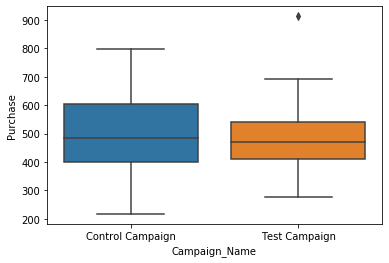

In [7]:
sns.boxplot(x = 'Campaign_Name', y = 'Purchase', data=pd.concat([control_group, test_group]));

#### We can see from the box-plot, the average purchase of group Control Group is higher than Test Group but we don't know this is random or not. So we will test to find out whether it is statistically significant or not.

## Assumption Controls for Independent t-test for two samples

Before running an independent-samples t-test it is critical that you first check whether your data meets assumption (normality) and assumption (homogeneity of variances). If the assumption of normality is not valid, the results of the tests will be unreliable.

- Normality Test (Shapiro-Wilk Test)
The Shapiro–Wilk test is a test of normality in frequentist statistics.

- Homogeneity of Variances Test (Levene's Test)
Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups.

###  Normality Test (Shapiro-Wilk Test)

In [8]:
shapiro(control_group.Purchase)

(0.9855586290359497, 0.9514130353927612)

Since P-value = 0.9514 is greater than alpha = 0.05, it is said to have a normal distribution and control group achieved condition. So it has a normal distribution.

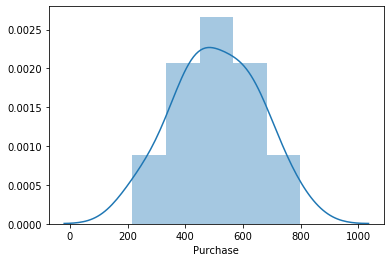

In [9]:
sns.distplot(control_group.Purchase, hist=True, kde=True);

In [10]:
shapiro(test_group.Purchase)

(0.9096213579177856, 0.01678052917122841)

Since P-value = 0.0167 is NOT greater than alpha = 0.05, it is said to NOT HAVE a NORMAL distribution and test group cannot achieved condition. So it sdoesnot have a normal distribution.

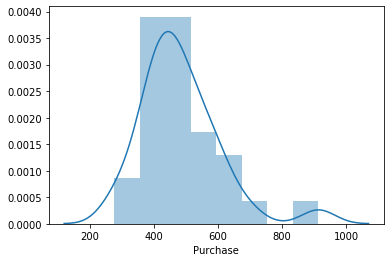

In [11]:
sns.distplot(test_group.Purchase, hist=True, kde=True);

### Homogeneity of Variances Test (Levene's Test)

In [12]:
levene(control_group.Purchase, test_group.Purchase)

LeveneResult(statistic=1.7952272261102875, pvalue=0.1857023734183355)

Since the P-value = 0.1857 value is greater than alpha = 0.05, so the variances are called homogeneous.

## Non-Parametric Independent Two Sample T-Test
While the assumption of variance homogeneity, which is one of the assumption tests, provides the condition, the normal distribution assumption could not be achieved. The Non-Parametric test that should be applied in this case is the **mannwhitneyu test**.

In [13]:
mannwhitneyu(control_group.Purchase, test_group.Purchase)

MannwhitneyuResult(statistic=361.0, pvalue=0.1794038295119949)

# Can we conclude statistically significant results?
 
H0: There is no statistically significant difference between the the purchase of the control group and the purchase of the test group.

Since pvalue = 0.1794 is greater than alpha = 0.05,  **The H0 hypothesis cannot be rejected.**

So finally we can say; **There is no statistically significant difference between the the purchase of the control group and the purchase of the test group**